In [ ]:
# Install the library
!pip -q install FireHR==0.1.2 pyhdf==0.10.2
!pip install rasterio
!pip install geopandas
!pip install elevation
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
#!cp "/content/gdrive/MyDrive/FYP_dataset.csv" "/content"
#!cp "/content/gdrive/MyDrive/FYP_dataset_without_nulls_with_labels for 6 clusters.csv" "/content"
#!unzip '/content/gdrive/MyDrive/satdata(1-13500).zip' -d '/content/data'
#!unzip '/content/gdrive/MyDrive/satdata(13501-29556).zip' -d '/content/data'


In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [3]:
!cp "/content/gdrive/MyDrive/FYP_dataset_without_nulls_with_labels for 6 clusters.csv" "/content"
#!unzip '/content/gdrive/MyDrive/satdata(1-13500).zip' -d '/content/data'
#!unzip '/content/gdrive/MyDrive/satdata(13501-29556).zip' -d '/content/data'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


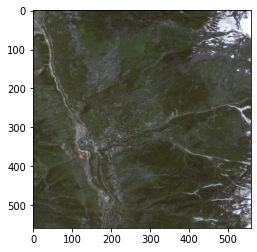

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from banet.data import open_tif
bands=["B2", "B3", "B4"]
brightness = 3
im = np.concatenate([open_tif(f'/content/data/content/content/data/16758/download.{b}.tif').read() for b in bands])
im = im.transpose(1,2,0).astype(np.float32)/10000
plt.imshow(brightness*im)

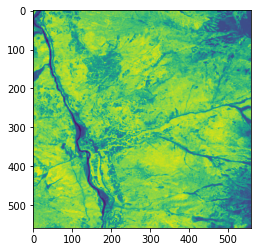

In [ ]:
import rasterio as rio
import numpy as np
import os
import pandas as pd
from collections import Counter
band = ["4","8"]
path = f'/content/data/content/content/data/16758/download.B{band[0]}.tif'
with rio.open(path, 'r') as f:
  b4 = f.read(1)
path = f'/content/data/content/content/data/16758/download.B{band[1]}.tif'    
with rio.open(path, 'r') as f:
  b8 = f.read(1)

ndvi = (b8.astype(float) - b4.astype(float)) / (b8 + b4)
ndvi = np.around(ndvi, decimals=2)

plt.imshow(ndvi)


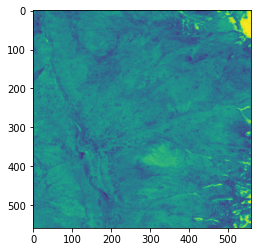

In [ ]:
import rasterio as rio
import numpy as np
import os
import pandas as pd
from collections import Counter
band = ["11","8"]
path = f'/content/data/content/content/data/16758/download.B{band[0]}.tif'
with rio.open(path, 'r') as f:
  b11 = f.read(1)
path = f'/content/data/content/content/data/16758/download.B{band[1]}.tif'    
with rio.open(path, 'r') as f:
  b8 = f.read(1)

ndwi = (b8.astype(float) - b11.astype(float)) / (b8 + b11)
ndwi = np.around(ndwi, decimals=2)

plt.imshow(ndwi)

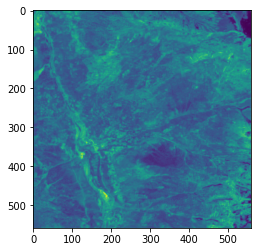

In [ ]:
import rasterio as rio
import numpy as np
import os
import pandas as pd
from collections import Counter
band = ["12","8"]
path = f'/content/data/content/content/data/16758/download.B{band[0]}.tif'
with rio.open(path, 'r') as f:
  b12 = f.read(1)
path = f'/content/data/content/content/data/16758/download.B{band[1]}.tif'    
with rio.open(path, 'r') as f:
  b8 = f.read(1)

ui = (b12.astype(float) - b8.astype(float)) / (b8 + b12)
ui = np.around(ui, decimals=2)

plt.imshow(ui)

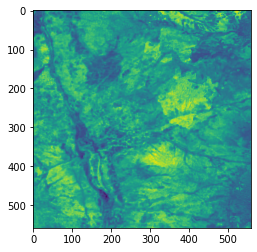

In [ ]:
import rasterio as rio
import numpy as np
import os
import pandas as pd
from collections import Counter
band = ["12","11"]
path = f'/content/data/content/content/data/16758/download.B{band[0]}.tif'
with rio.open(path, 'r') as f:
  b12 = f.read(1)
path = f'/content/data/content/content/data/16758/download.B{band[1]}.tif'    
with rio.open(path, 'r') as f:
  b11 = f.read(1)

laterite = (b11.astype(float)) /b12.astype(float)
laterite = np.around(laterite, decimals=2)

plt.imshow(laterite)

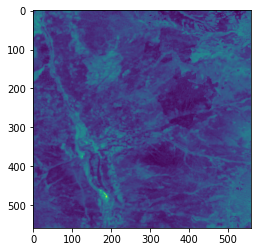

In [ ]:
import rasterio as rio
import numpy as np
import os
import pandas as pd
from collections import Counter
band = ["12","11"]
path = f'/content/data/content/content/data/16758/download.B{band[0]}.tif'
with rio.open(path, 'r') as f:
  b12 = f.read(1)
path = f'/content/data/content/content/data/16758/download.B{band[1]}.tif'    
with rio.open(path, 'r') as f:
  b11 = f.read(1)

biotite = (b12.astype(float)) /b11.astype(float)
biotite = np.around(biotite, decimals=2)

plt.imshow(biotite)

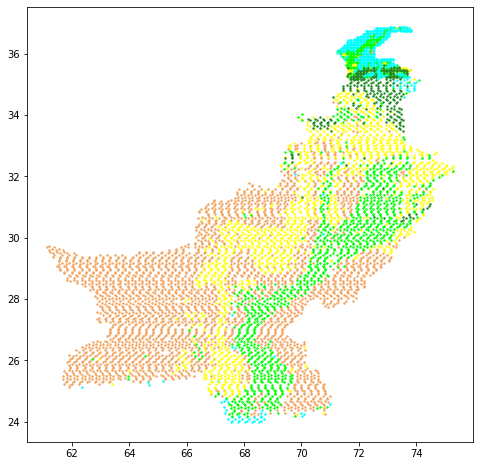

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
dataset = pd.read_csv('/content/FYP_dataset_without_nulls_with_labels for 6 clusters.csv')
dataset_0 = dataset[dataset['label_assigned']==0]
#dataset_0 = dataset_0[dataset_0['mean_ndvi']>0.15]
#dataset_0 = dataset_0[dataset_0['stddev_ndvi']<0.2]
plt.scatter(dataset_0['mean_x'], dataset_0['mean_y'], c = 'sandybrown',s=2)

dataset_3 = dataset[dataset['label_assigned']==3]
#dataset_3 = dataset_3[dataset_3['mean_ndvi']>0.15]
#dataset_3 = dataset_3[dataset_3['stddev_ndvi']<0.2]
plt.scatter(dataset_3['mean_x'], dataset_3['mean_y'], c = 'aqua',s=2)

dataset_2 = dataset[dataset['label_assigned']==2]
#dataset_2 = dataset_2[dataset_2['mean_ndvi']>0.15]
#dataset_2 = dataset_2[dataset_2['stddev_ndvi']<0.2]
plt.scatter(dataset_2['mean_x'], dataset_2['mean_y'], c = 'yellow',s=2)

dataset_4 = dataset[dataset['label_assigned']==4]
#dataset_4 = dataset_4[dataset_4['mean_ndwi']>0.2]
#dataset_4 = dataset_4[dataset_4['stddev_ndvi']<0.2]
plt.scatter(dataset_4['mean_x'], dataset_4['mean_y'], c = 'lime',s=2)




dataset_1 = dataset[dataset['label_assigned']==1]
#dataset_1 = dataset_1[dataset_1['mean_ndvi']>0.15]
#dataset_1 = dataset_1[dataset_1['stddev_ndvi']<0.2]
plt.scatter(dataset_1['mean_x'], dataset_1['mean_y'], c = 'forestgreen',s=2)

dataset_5 = dataset[dataset['label_assigned']==5]
#dataset_3 = dataset_3[dataset_3['mean_ndvi']>0.15]
#dataset_3 = dataset_3[dataset_3['stddev_ndvi']<0.2]
plt.scatter(dataset_5['mean_x'], dataset_5['mean_y'], c ='aqua',s=2)



plt.show()
